In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
X = X.iloc[:, :-2]

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [10]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [9]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

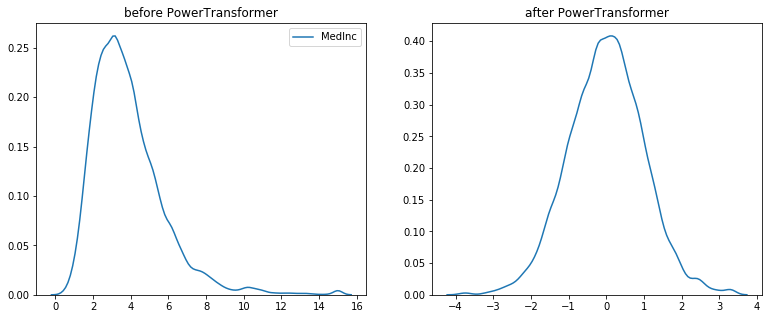

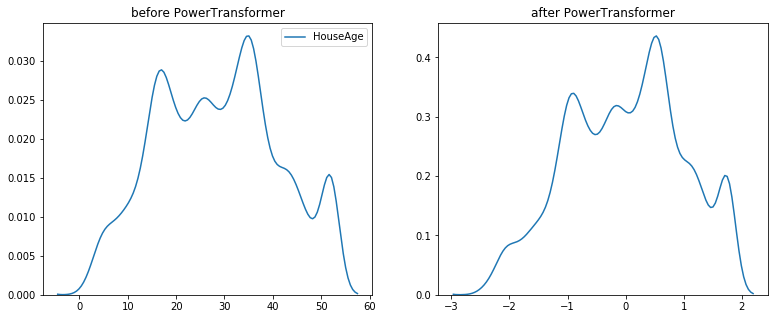

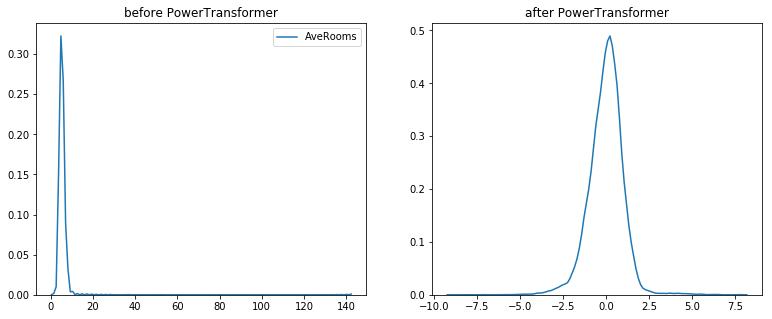

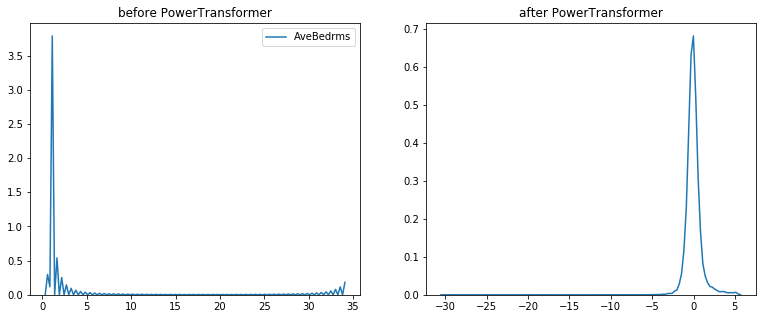

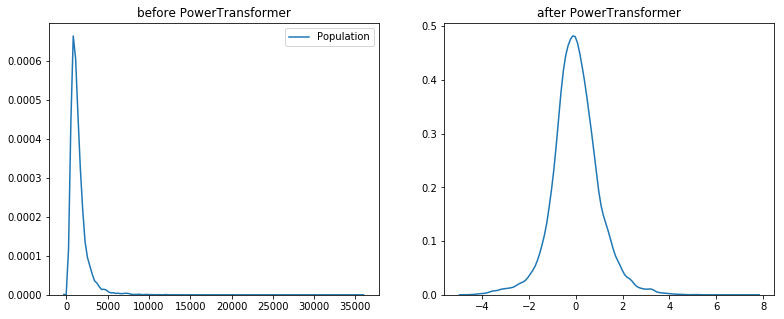

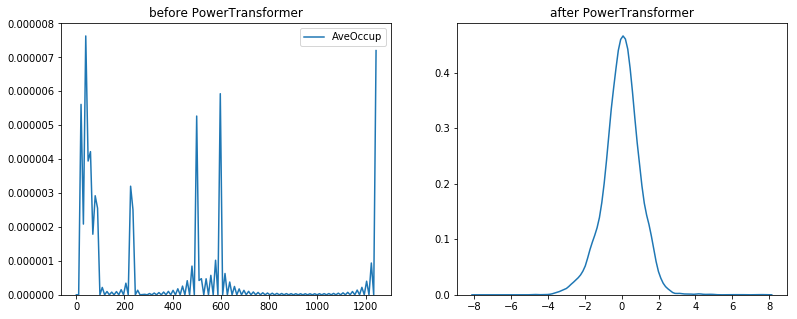

In [11]:
for col in X.columns:
    plots(X, col, PowerTransformer(method='box-cox'))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [13]:
p = PowerTransformer(method='box-cox')
p.fit_transform(X_train)

array([[ 0.40281908, -1.9278255 ,  1.42598869,  0.82522832, -1.96446909,
         0.84580969],
       [ 0.47870349,  1.75743613,  0.12767533,  0.34757827,  0.32304211,
         0.65346554],
       [ 0.2418474 , -0.16025422, -0.36702734, -0.09053295, -0.21606302,
        -0.01882737],
       ...,
       [-0.19787027,  0.22945234, -1.3508525 , -1.12159002, -0.70907513,
        -1.94051909],
       [ 1.02558383,  0.45750336, -0.47358212,  0.05988359, -0.17597578,
        -0.89334188],
       [-1.88200114, -1.07487729, -1.04180675,  0.34757827, -0.21336265,
         0.77358437]])

In [14]:
p.lambdas_

array([ 0.0982972 ,  0.81124521, -0.28269238, -1.58333514,  0.23291759,
       -0.49773798])

In [15]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', PowerTransformer(method='box-cox')),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [16]:
model_accuracy_scaled(KNeighborsRegressor())

0.6459708428393122

In [17]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [18]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.6686167987374966

In [19]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.6687567614986214